In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, utils
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("soumikrakshit/anime-faces")

print("Path to dataset files:", path)

100%|██████████| 441M/441M [00:03<00:00, 151MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/soumikrakshit/anime-faces/versions/1


In [16]:
# Paths and Hyperparameters
train_path = "/root/.cache/kagglehub/datasets/soumikrakshit/anime-faces/versions/1"
image_size = 64
batch_size = 128
latent_dim = 100  # Latent vector size
lr = 0.0002
beta1 = 0.5
epochs = 50

# Image transforms
transform = transforms.Compose([
    transforms.Resize(image_size),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5]*3, [0.5]*3)  # Normalize to [-1, 1]
])

In [11]:
# Dataset & DataLoader
dataset = ImageFolder(root=train_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [12]:
# Generator (DCGAN)
class Generator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.ConvTranspose2d(latent_dim, 512, 4, 1, 0, bias=False),  # 512 × 4 × 4
            # (in_channels, out_channels, kernel_size, stride, padding)
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),  # 256 × 8 × 8
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),  # 128 × 16 × 16
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),  #  64 × 32 × 32
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),  # 3 × 64 × 64
            nn.Tanh()  # Output in [-1, 1]
        )

    def forward(self, z):
        return self.net(z)

In [13]:
# Discriminator (DCGAN)
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x).view(-1)

In [14]:
# Initialize models
G = Generator().to(device)
D = Discriminator().to(device)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(G.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_D = optim.Adam(D.parameters(), lr=lr, betas=(beta1, 0.999))

Epoch [1/50]  D_loss: 0.3939  G_loss: 4.5970


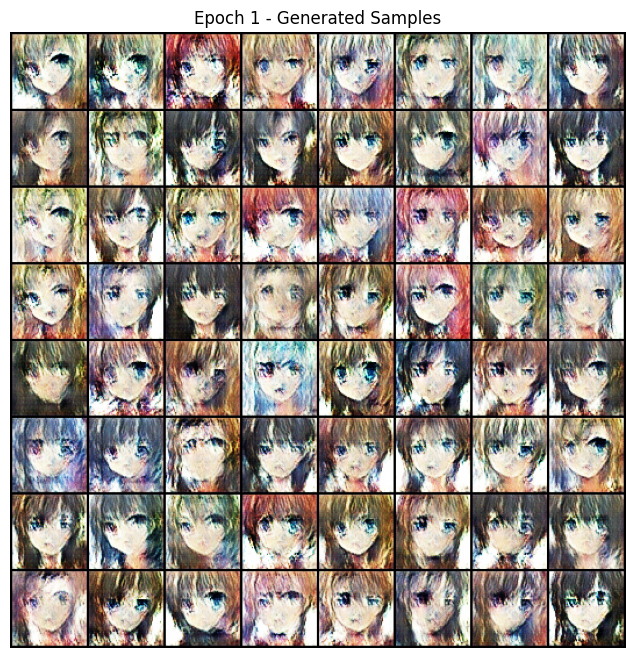

Epoch [2/50]  D_loss: 0.4394  G_loss: 8.2043
Epoch [3/50]  D_loss: 1.2597  G_loss: 4.3899
Epoch [4/50]  D_loss: 0.1449  G_loss: 4.9320
Epoch [5/50]  D_loss: 0.4188  G_loss: 6.5669
Epoch [6/50]  D_loss: 0.1372  G_loss: 5.6231
Epoch [7/50]  D_loss: 0.1364  G_loss: 5.8541
Epoch [8/50]  D_loss: 0.1926  G_loss: 3.8849
Epoch [9/50]  D_loss: 0.3592  G_loss: 4.2929
Epoch [10/50]  D_loss: 0.2091  G_loss: 6.5873
Epoch [11/50]  D_loss: 0.4204  G_loss: 7.6943
Epoch [12/50]  D_loss: 0.5847  G_loss: 9.6401
Epoch [13/50]  D_loss: 0.3071  G_loss: 4.0591
Epoch [14/50]  D_loss: 1.7066  G_loss: 1.3178
Epoch [15/50]  D_loss: 0.1226  G_loss: 5.3162
Epoch [16/50]  D_loss: 0.1691  G_loss: 5.2223
Epoch [17/50]  D_loss: 0.2412  G_loss: 6.7122
Epoch [18/50]  D_loss: 0.1637  G_loss: 5.1947
Epoch [19/50]  D_loss: 0.1840  G_loss: 5.5498
Epoch [20/50]  D_loss: 0.1066  G_loss: 5.6998


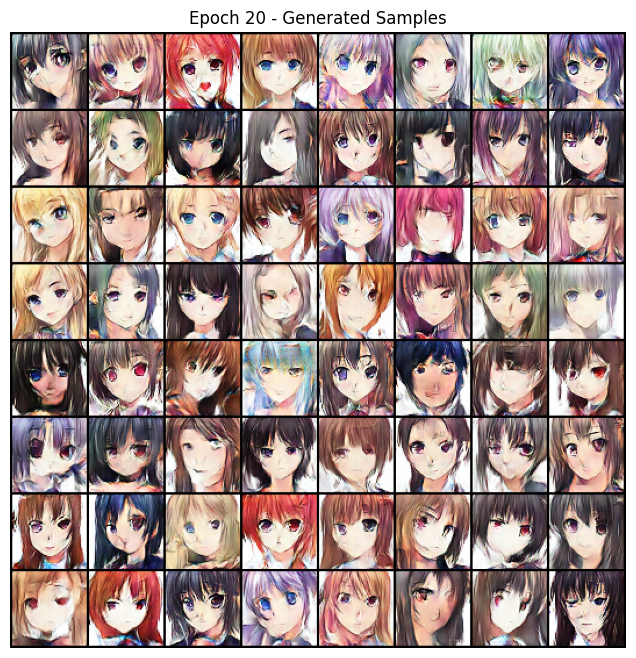

Epoch [21/50]  D_loss: 0.1293  G_loss: 4.0703
Epoch [22/50]  D_loss: 0.2748  G_loss: 3.9625
Epoch [23/50]  D_loss: 0.0970  G_loss: 4.5878
Epoch [24/50]  D_loss: 0.0344  G_loss: 5.8886
Epoch [25/50]  D_loss: 0.1118  G_loss: 3.1843
Epoch [26/50]  D_loss: 0.2297  G_loss: 4.1529
Epoch [27/50]  D_loss: 0.0941  G_loss: 3.8234
Epoch [28/50]  D_loss: 0.1991  G_loss: 5.6468
Epoch [29/50]  D_loss: 0.0898  G_loss: 4.4396
Epoch [30/50]  D_loss: 0.1221  G_loss: 3.6718
Epoch [31/50]  D_loss: 0.0602  G_loss: 3.9317
Epoch [32/50]  D_loss: 0.1080  G_loss: 5.4840
Epoch [33/50]  D_loss: 0.0906  G_loss: 3.8909
Epoch [34/50]  D_loss: 0.0580  G_loss: 5.1593
Epoch [35/50]  D_loss: 0.3208  G_loss: 3.5910
Epoch [36/50]  D_loss: 0.0642  G_loss: 6.1315
Epoch [37/50]  D_loss: 0.0677  G_loss: 5.1275
Epoch [38/50]  D_loss: 0.0472  G_loss: 4.5678
Epoch [39/50]  D_loss: 0.0814  G_loss: 3.8541
Epoch [40/50]  D_loss: 0.1403  G_loss: 3.8496


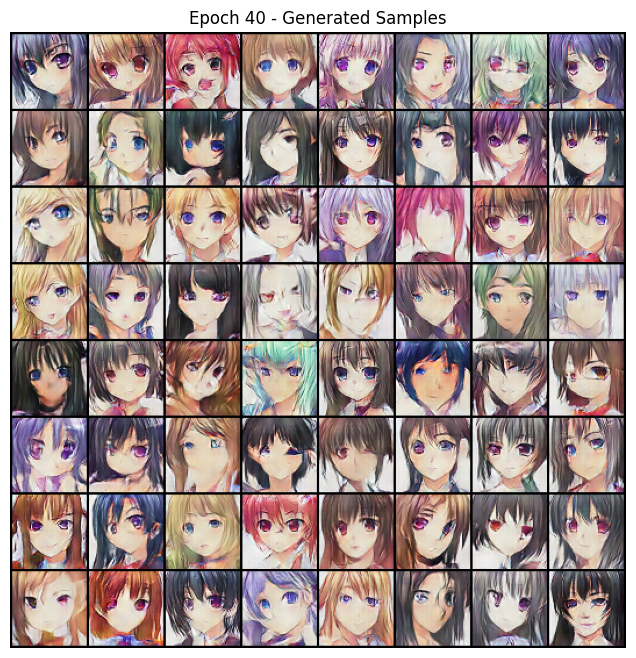

Epoch [41/50]  D_loss: 1.1833  G_loss: 8.9405
Epoch [42/50]  D_loss: 0.0411  G_loss: 5.5788
Epoch [43/50]  D_loss: 0.0940  G_loss: 8.4220
Epoch [44/50]  D_loss: 1.7856  G_loss: 4.5962
Epoch [45/50]  D_loss: 0.0356  G_loss: 4.6468
Epoch [46/50]  D_loss: 0.0313  G_loss: 5.2997
Epoch [47/50]  D_loss: 0.0508  G_loss: 5.0329
Epoch [48/50]  D_loss: 0.1853  G_loss: 4.1998
Epoch [49/50]  D_loss: 0.0800  G_loss: 4.7582
Epoch [50/50]  D_loss: 0.3843  G_loss: 1.8593


In [17]:
# Fixed noise for testing
fixed_noise = torch.randn(64, latent_dim, 1, 1, device=device)

# Training loop
for epoch in range(epochs):
    for i, (real_imgs, _) in enumerate(dataloader):
        real_imgs = real_imgs.to(device)
        batch_size = real_imgs.size(0)

        # Labels
        real_labels = torch.ones(batch_size, device=device)
        fake_labels = torch.zeros(batch_size, device=device)

        # ---------------------
        #  Train Discriminator
        # ---------------------
        z = torch.randn(batch_size, latent_dim, 1, 1, device=device)
        fake_imgs = G(z)

        D_real = D(real_imgs)
        D_fake = D(fake_imgs.detach())

        D_loss_real = criterion(D_real, real_labels)
        D_loss_fake = criterion(D_fake, fake_labels)
        D_loss = D_loss_real + D_loss_fake

        optimizer_D.zero_grad()
        D_loss.backward()
        optimizer_D.step()

        # -----------------
        #  Train Generator
        # -----------------
        z = torch.randn(batch_size, latent_dim, 1, 1, device=device)
        fake_imgs = G(z)
        D_output = D(fake_imgs)

        G_loss = criterion(D_output, real_labels)

        optimizer_G.zero_grad()
        G_loss.backward()
        optimizer_G.step()

    print(f"Epoch [{epoch+1}/{epochs}]  D_loss: {D_loss.item():.4f}  G_loss: {G_loss.item():.4f}")

    # Show generated samples
    if (epoch + 1) % 20 == 0 or epoch == 0:
        G.eval() # switch to eval mode
        with torch.no_grad():
            fake_samples = G(fixed_noise).detach().cpu()
            grid = utils.make_grid(fake_samples, nrow=8, normalize=True)
            plt.figure(figsize=(8,8))
            plt.axis("off")
            plt.title(f"Epoch {epoch+1} - Generated Samples")
            plt.imshow(grid.permute(1, 2, 0))
            plt.show()
        G.train()  # switch back to training mode